In [ ]:
#1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
#3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
#22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#  PART I

In [ ]:
mushroom = fetch_ucirepo(id=73)
a = mushroom.data.features
b = mushroom.data.targets
df =  pd.DataFrame(data = a, columns = mushroom.targets)
df.shape

(8124, 22)

In [ ]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.info

<bound method DataFrame.info of      cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c    

In [ ]:
b.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [ ]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'population', 'habitat']]
print(X)

     cap-shape cap-surface cap-color population habitat
0            x           s         n          s       u
1            x           s         y          n       g
2            b           s         w          n       m
3            x           y         w          s       u
4            x           s         g          a       g
...        ...         ...       ...        ...     ...
8119         k           s         n          c       l
8120         x           s         n          v       l
8121         f           s         n          c       l
8122         k           y         n          v       l
8123         x           s         n          c       l

[8124 rows x 5 columns]


In [ ]:
X['class'] = b

<ipython-input-70-db03c6409de2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['class'] = b


In [ ]:
X.shape

(8124, 6)

In [ ]:
X

,cap-shape,cap-surface,cap-color,population,habitat,class
0,x,s,n,s,u,p
1,x,s,y,n,g,e
2,b,s,w,n,m,e
3,x,y,w,s,u,p
4,x,s,g,a,g,e
...,...,...,...,...,...,...
8119,k,s,n,c,l,e
8120,x,s,n,v,l,e
8121,f,s,n,c,l,e
8122,k,y,n,v,l,p


X_unique = a, b, c
y_class = 0, 1

P(y1|a) = P(y1)*P(a)
P(y2|a) = P(y2)*P(a)

выбираем max a: 1\0


In [ ]:
lst = []

for column in X[X.columns.difference(['class'])]:
  lst.append(X[column].value_counts())

In [ ]:
df_data = pd.DataFrame(lst).T

Text(0.5, 1.0, '\nhabitat')

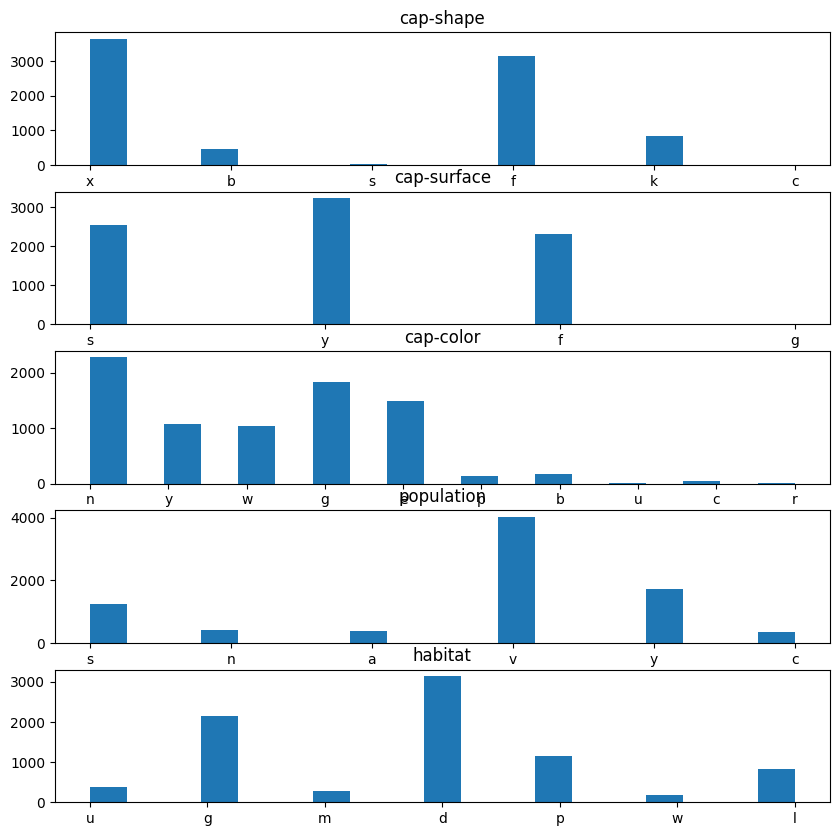

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10,10))
n_bins = len(df_data)

axs[0].hist(X['cap-shape'], bins=n_bins)
axs[0].set_title('cap-shape')
axs[1].hist(X['cap-surface'], bins=n_bins)
axs[1].set_title('\n\ncap-surface')
axs[2].hist(X['cap-color'], bins=n_bins)
axs[2].set_title('\ncap-color')
axs[3].hist(X['population'], bins=n_bins)
axs[3].set_title('\n')
axs[3].set_title('\npopulation')
axs[4].hist(X['habitat'], bins=n_bins)
axs[4].set_title('\nhabitat')

In [ ]:
df_habitat = X['habitat'].groupby(X['class']).value_counts().rename('count').to_frame().reset_index()
df_popul = X['population'].groupby(X['class']).value_counts().rename('count').to_frame().reset_index()
df_shape = X['cap-shape'].groupby(X['class']).value_counts().rename('count').to_frame().reset_index()
df_color = X['cap-color'].groupby(X['class']).value_counts().rename('count').to_frame().reset_index()
df_surface = X['cap-surface'].groupby(X['class']).value_counts().rename('count').to_frame().reset_index()

<Axes: xlabel='cap-surface', ylabel='count'>

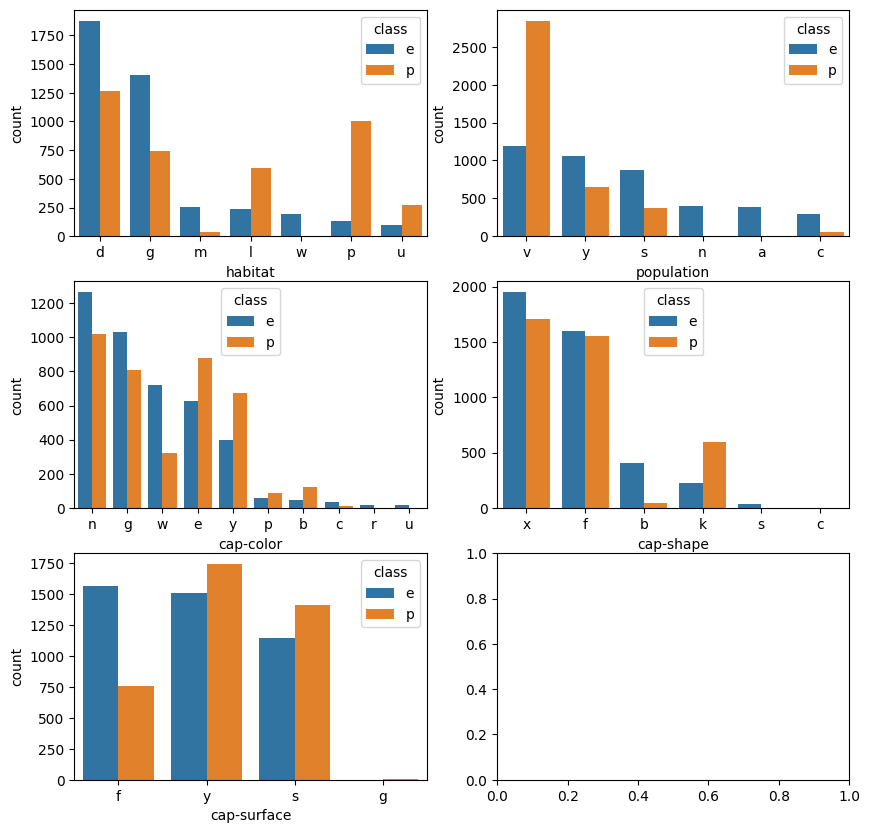

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

sns.barplot(data = df_habitat,x='habitat',y='count',hue ='class', ax = axs[0, 0])
sns.barplot(data = df_popul,x='population',y='count',hue ='class', ax = axs[0, 1])
sns.barplot(data = df_color,x='cap-color',y='count',hue ='class', ax = axs[1, 0])
sns.barplot(data = df_shape,x='cap-shape',y='count',hue ='class', ax = axs[1, 1])
sns.barplot(data = df_surface,x='cap-surface',y='count',hue ='class', ax = axs[2, 0])

In [ ]:
x = df[['cap-shape', 'cap-surface', 'cap-color', 'population', 'habitat']]
num = {'e':0, 'p':1}
y = X["class"].replace(num)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(f'shape of X Train = {X_train.shape}')
print(f'shape of X Test = {X_test.shape}')
print(f'shape of Y Train = {y_train.shape}')
print(f'shape of Y Test = {y_test.shape}')

shape of X Train = (6499, 5)
shape of X Test = (1625, 5)
shape of Y Train = (6499,)
shape of Y Test = (1625,)


In [ ]:
#  PART II

In [ ]:
# априорная вероятность P(y):
probY = X_train.groupby(y_train).apply(lambda x: len(x)) / X_train.shape[0]
print(probY)

class
0    0.516387
1    0.483613
dtype: float64


In [ ]:
# X_train, X_test, y_train, y_test
def prob(X, y, w):
   probability = {}
   unique_x_j = X.unique() #нахожу уник. знач. х_j, кот. может принимать перем.
   mask_data = X[y == w] #обрезаю х, оставляю только заданный класс
   N_w_j = mask_data.count() #число х, принадлежащих данному классу
   n = 1
   for el in unique_x_j:
     mask = mask_data == el # для кажд. уник. знач. х_j
     n = mask_data[mask].count()  # считаю их кол-во
     probability[el] = n / N_w_j

   return probability

def Bayes_class(X, y): # получаю столбец х, столбец классов у, класс (0 или 1)
  scores_list = []
  y_predict = []
  prob_0 = prob(X, y, 0)
  prob_1 = prob(X, y, 1) #словарь вероятностей для кадой уник. перем.

  for element in X:
    total_prob_0 = probY.iloc[0] * prob_0[element]
    total_prob_1 = probY.iloc[1] * prob_1[element]
    scores_list = [total_prob_0, total_prob_1]
    y_predict.append(np.argmax(scores_list))
  return y_predict

test = []
train = []
for col in X_test.columns:
    test.append(accuracy_score(y_test, Bayes_class(X_test[col], y_test)))
    train.append(accuracy_score(y_train, Bayes_class(X_train[col], y_train)))
final_data = pd.DataFrame({'test':test,'train':train})
final_data = final_data.set_index(X_test.columns)
final_data


,test,train
cap-shape,0.568000,0.561933
cap-surface,0.566154,0.584090
cap-color,0.601231,0.593784
population,0.723077,0.721496
habitat,0.688000,0.690876


population is the best

In [ ]:
#  PART III

In [ ]:
one_hot_train = pd.get_dummies(X_train['population'])
one_hot_test = pd.get_dummies(X_test['population'])
one_hot_test

,a,c,n,s,v,y
380,0,0,0,1,0,0
3641,0,0,0,0,0,1
273,0,0,1,0,0,0
1029,1,0,0,0,0,0
684,0,0,0,0,1,0
...,...,...,...,...,...,...
3535,0,0,0,0,1,0
1643,1,0,0,0,0,0
6494,0,0,0,0,1,0
6,0,0,1,0,0,0


In [ ]:
one_hot_train

,a,c,n,s,v,y
7434,0,0,0,1,0,0
7725,0,0,1,0,0,0
783,0,0,0,1,0,0
1928,0,0,0,1,0,0
7466,0,0,0,0,1,0
...,...,...,...,...,...,...
4931,0,1,0,0,0,0
3264,0,0,0,0,0,1
1653,0,0,0,1,0,0
2607,0,0,0,0,1,0


In [ ]:
clf = BernoulliNB(force_alpha=True)
clf.fit(one_hot_train, y_train)
clf.predict(one_hot_test)

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print(y_test)

380     1
3641    0
273     0
1029    0
684     0
       ..
3535    0
1643    0
6494    1
6       0
3175    0
Name: class, Length: 1625, dtype: int64


In [ ]:
clf.score(one_hot_test, y_test)

0.7230769230769231

In [ ]:
accuracy1 = accuracy_score(y_test, clf.predict(one_hot_test))
print(accuracy1)

0.7230769230769231


In [ ]:
#  PART IV

In [ ]:
alpha = 3

In [ ]:
probY = (X_train['population'].groupby(y_train).apply(lambda x: len(x)) + alpha)/ (X_train['population'].shape[0] + alpha*2)
print(probY)

class
0    0.516372
1    0.483628
Name: population, dtype: float64


In [ ]:
# X_train, X_test, y_train, y_test

def prob(X, y, w):
   probability = {}
   unique_x_j = X.unique() #нахожу уник. знач. х_j, кот. может принимать перем.
   mask_data = X[y == w] #обрезаю х, оставляю только заданный класс
   N_w_j = mask_data.count() #число х, принадлежащих данному классу
   n = 1
   T = unique_x_j.size
   for el in unique_x_j:
     mask = mask_data == el # для кажд. уник. знач. х_j
     n = mask_data[mask].count()  # считаю их кол-во
     probability[el] = (n + alpha) / (N_w_j + alpha*T) #сглаживание Лапласа

   return probability

def Bayes_class(X, y): # получаю столбец х, столбец классов у, класс (0 или 1)
  scores_list = []
  y_predict = []
  prob_0 = prob(X_train['population'], y_train, 0)
  prob_1 = prob(X_train['population'], y_train, 1) #словарь вероятностей для кадой уник. перем.

  for element in X:
    total_prob_0 = probY.iloc[0] * prob_0[element]
    total_prob_1 = probY.iloc[1] * prob_1[element]
    scores_list = [total_prob_0, total_prob_1]
    y_predict.append(np.argmax(scores_list))
  return y_predict

test_acc = (accuracy_score(y_test, Bayes_class(X_test['population'], y_test)))
print(test_acc)

0.7230769230769231
